In [1]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Reading Data Files from .mat Format:


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
#train = loadmat('gdrive/My Drive/Colab Notebooks/2010rainfall.mat')
#test = loadmat('gdrive/My Drive/Colab Notebooks/2011rainfall.mat')
#UNCOMMENT THE ABOVE IF YOU ARE UPLOADING FILE FROM G-DRIVE. COMMENT DOWN THE BELOW TWO
train = loadmat('/content/2010rainfall.mat')
test = loadmat('/content/2011rainfall.mat')
train_Y = train['ZR1']
train_X = train['XR1']
test_Y = test['ZR']
test_X = test['XR']
w = np.zeros([1,358])
lr = 0.01
iters = 1000
print(train_X.shape)
print(train_Y.shape)

(357, 122)
(1, 122)


In [3]:
def featurematrix(train, s):
  train_x = train.copy()
  X = []
  x = []
  for t in range(2,122):
    for a in range(0,357):
      if a is not s:
        x.append(train_x[a][t])
    x.append(train_x[s][t-1])
    x.append(train_x[s][t-2])
    X.append(x)
    x = []
  Xv = np.array(X)
  return Xv

In [4]:
def computeCost(X,Y,Y_pred):
    tobesummed = np.power((Y-Y_pred),2)
    return np.sum(tobesummed)/(2*len(X))

# Linear Regression Model for Rainfall Prediction:

In [5]:
#model for mumbai
linear_regressor1 = LinearRegression()
X1 = featurematrix(train_X, 41)
Y1 = train_X[41][2:]
linear_regressor1.fit(X1, Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#model for Delhi
linear_regressor2 = LinearRegression()
X3 = featurematrix(train_X, 157)
Y3 = train_X[157][2:]
linear_regressor2.fit(X3, Y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#model for kharagpur
linear_regressor3 = LinearRegression()
X2 = featurematrix(train_X, 298)
Y2 = train_X[298][2:]
linear_regressor3.fit(X2, Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MSE cost of Mumbai: 1307.1690860864


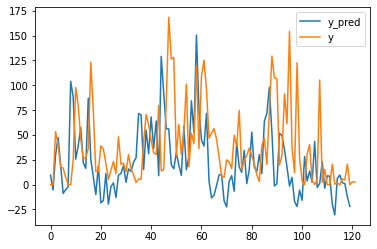

In [8]:
#prediction for Mumbai in 2011
X_test = featurematrix(test_X, 41)
y = X_test @ linear_regressor1.coef_.T + linear_regressor1.intercept_
y.resize(120,)
plt.plot(y, label = "y_pred")
plt.plot(test_X[41], label = "y")
plt.legend()
cost = mse(y, test_X[41][2:])
print(f'MSE cost of Mumbai: {cost}')

MSE cost of Delhi: 458.3000599140169


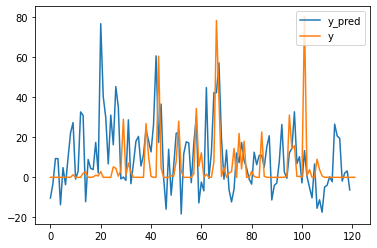

In [9]:
X_test = featurematrix(test_X, 157)
y = X_test @ linear_regressor2.coef_.T + linear_regressor2.intercept_
y.resize(120,)
plt.plot(y, label = "y_pred")
plt.plot(test_X[157], label = "y")
plt.legend()
cost = mse(y, test_X[157][2:])
print(f'MSE cost of Delhi: {cost}')

MSE cost of Kharagpur: 75.97360743800978


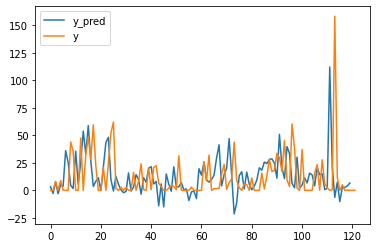

In [10]:
X_test = featurematrix(test_X, 298)
y = X_test @ linear_regressor3.coef_.T + linear_regressor3.intercept_
y.resize(120,)
plt.plot(y, label = "y_pred")
plt.plot(test_X[298], label = "y")
plt.legend()
cost = mse(y, test_X[298][2:])
print(f'MSE cost of Kharagpur: {cost}')

# Lasso Regression and Feature Extraction:

MSE cost: 1057.02013007587


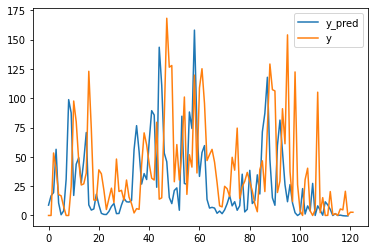

In [100]:
lasso_regressor1 = Lasso(alpha = 32, max_iter = 7000)
X = featurematrix(train_X, 41)
Y = train_X[41][2:]
lasso_regressor1.fit(X,Y)

X_test = featurematrix(test_X, 41)
y = X_test @ lasso_regressor1.coef_.T + lasso_regressor1.intercept_
y.resize(120,)
plt.plot(y, label = "y_pred")
plt.plot(test_X[41], label = "y")
plt.legend()
cost = mse(y, test_X[41][2:])
print(f'MSE cost: {cost}')

In [101]:
predictors = np.sort(lasso_regressor1.coef_)[-5:]
print("The top 5 predictors for Mumbai are -")
for i in range(5):
  print("%d"%np.where(lasso_regressor1.coef_ == predictors[i]))

The top 5 predictors for Mumbai are -
41
57
315
40
25


MSE cost: 180.3330291889829


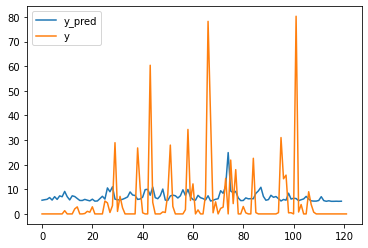

In [102]:
lasso_regressor2 = Lasso(alpha = 80, max_iter = 7000)
X = featurematrix(train_X, 157)
Y = train_X[157][2:]
lasso_regressor2.fit(X,Y)


X_test = featurematrix(test_X, 157)
y = X_test @ lasso_regressor2.coef_.T + lasso_regressor2.intercept_
y.resize(120,)
plt.plot(y, label = "y_pred")
plt.plot(test_X[157], label = "y")
plt.legend()
cost = mse(y, test_X[157][2:])
print(f'MSE cost: {cost}')

In [103]:
predictors = np.sort(lasso_regressor2.coef_)[-5:]
print("The top 5 predictors for Delhi are -")
for i in range(5):
  print("%d"%np.where(lasso_regressor2.coef_ == predictors[i]))

The top 5 predictors for Delhi are -
158
215
25
160
214


MSE cost: 0.03653034857107292


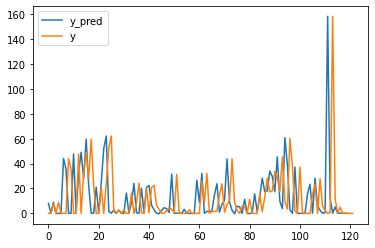

In [114]:
lasso_regressor3 = Lasso(alpha = 0.01, max_iter = 7000)
X = featurematrix(train_X, 298)
Y = train_X[298][2:]
lasso_regressor3.fit(X,Y)

X_test = featurematrix(test_X, 298)
y = X_test @ lasso_regressor3.coef_.T + lasso_regressor3.intercept_
y.resize(120,)
plt.plot(y, label = "y_pred")
plt.plot(test_X[298], label = "y")
plt.legend()
cost = mse(y, test_X[298][2:])
print(f'MSE cost: {cost}')

In [115]:
predictors = np.sort(lasso_regressor3.coef_)[5:]
print("The top predictor for Kharagpur are -")
for i in range(5):
  print("%d"%np.where(lasso_regressor3.coef_ == predictors[i]))

The top predictor for Kharagpur are -
177
161
85
26
130


# Decision Tree Classifier and Extarcting Important Features:

In [11]:
dt = DecisionTreeClassifier()
dt.fit(train_X.T, train_Y.T)
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y) 

feat_labels = range(357)
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(10):
  print("%2d) %-*s %f"%(f+1, 30, np.where(dt.feature_importances_ == importances[indices[f]]), importances[indices[f]]))

 1) (array([184]),)                0.285360
 2) (array([252]),)                0.149016
 3) (array([192]),)                0.147573
 4) (array([26]),)                 0.122125
 5) (array([205]),)                0.099694
 6) (array([159]),)                0.078542
 7) (array([350]),)                0.040954
 8) (array([144]),)                0.039353
 9) (array([62]),)                 0.037385
10) (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 1

In [12]:
y_pred = dt.predict(test_X.T)
print(y_pred)
test_Y.resize(122,)
cost = mse(y_pred.T, test_Y)
print(f'MSE cost: {cost}')
accuracy = accuracy_score(y_pred.T, test_Y)
print(f'Accuracy: {accuracy}')

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
MSE cost: 0.27049180327868855
Accuracy: 0.7295081967213115
